<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice.png' width=300/></center>

# CP2. [실습] 데이터 전처리와 시각화: 빌보드

- 본 실습은 간단한 데이터 시각화 방법을 직접 체험하기 위한 것입니다.
- 차트를 화려하게 꾸미는데 목적을 두지 말고 전처리 부분에 중점을 두는 것이 좋습니다.
- 우선 다음과 같은 과정으로 데이터 시각화를 수행함으로 알고 진행하기 바랍니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/visualization.png' width="650" align="left">

In [0]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline   
%config InlineBackend.figure_format = 'retina'

## 1. 데이터 불러오기

- **read_csv()** 함수를 사용해 분석할 데이터를 csv 파일에서 불러옵니다.
- billboard 데이터 셋은 2000년 빌보드 차드 정보입니다.
- 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/billboard.csv'

In [0]:
# billboard
f_path = 'https://raw.githubusercontent.com/Jangrae/csv/master/billboard.csv'
billboard = pd.read_csv(f_path)

## 2. 데이터 확인

- 데이터를 알아야 데이터를 분석할 수 있습니다.
- 우선 분석할 데이터가 어떤 형태의 데이터인지 확인합니다.

**1) 상위/하위 데이터 확인**

- **head()**, **tail()** 메소드로 상/하위 데이터를 확인합니다.

In [4]:
# 상위 5개 행 확인
billboard.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,x4th.week,x5th.week,x6th.week,x7th.week,x8th.week,x9th.week,x10th.week,x11th.week,x12th.week,x13th.week,x14th.week,x15th.week,x16th.week,x17th.week,x18th.week,x19th.week,x20th.week,x21st.week,x22nd.week,x23rd.week,x24th.week,x25th.week,x26th.week,x27th.week,x28th.week,x29th.week,x30th.week,x31st.week,x32nd.week,x33rd.week,...,x37th.week,x38th.week,x39th.week,x40th.week,x41st.week,x42nd.week,x43rd.week,x44th.week,x45th.week,x46th.week,x47th.week,x48th.week,x49th.week,x50th.week,x51st.week,x52nd.week,x53rd.week,x54th.week,x55th.week,x56th.week,x57th.week,x58th.week,x59th.week,x60th.week,x61st.week,x62nd.week,x63rd.week,x64th.week,x65th.week,x66th.week,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,33.0,23.0,15.0,7.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,7.0,10.0,12.0,15.0,22.0,29.0,31.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,5.0,2.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,15.0,19.0,21.0,26.0,36.0,48.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,31.0,20.0,13.0,7.0,6.0,4.0,4.0,4.0,6.0,4.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,4.0,8.0,8.0,12.0,14.0,17.0,21.0,24.0,30.0,34.0,37.0,46.0,47.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,14.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,8.0,11.0,16.0,20.0,25.0,27.0,27.0,29.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,29.0,23.0,18.0,11.0,9.0,9.0,11.0,1.0,1.0,1.0,1.0,4.0,8.0,12.0,22.0,23.0,43.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 하위 5개 행 확인
billboard.tail()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,x4th.week,x5th.week,x6th.week,x7th.week,x8th.week,x9th.week,x10th.week,x11th.week,x12th.week,x13th.week,x14th.week,x15th.week,x16th.week,x17th.week,x18th.week,x19th.week,x20th.week,x21st.week,x22nd.week,x23rd.week,x24th.week,x25th.week,x26th.week,x27th.week,x28th.week,x29th.week,x30th.week,x31st.week,x32nd.week,x33rd.week,...,x37th.week,x38th.week,x39th.week,x40th.week,x41st.week,x42nd.week,x43rd.week,x44th.week,x45th.week,x46th.week,x47th.week,x48th.week,x49th.week,x50th.week,x51st.week,x52nd.week,x53rd.week,x54th.week,x55th.week,x56th.week,x57th.week,x58th.week,x59th.week,x60th.week,x61st.week,x62nd.week,x63rd.week,x64th.week,x65th.week,x66th.week,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
312,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Smith, Will",Freakin' It,3:58,Rap,2000-02-12,2000-02-12,99,99.0,99.0,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,99,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,2000-07-01,99,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316,2000,Fragma,Toca's Miracle,3:22,R&B,2000-10-28,2000-10-28,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**2) 열 데이터 개수, NaN 값 여부 확인**

- **info()** 메소드로 각 열의 값 개수, **NaN**값 포함 여부를 확인합니다.
- NaN값이 포함되어 있으면 결측치에 대한 해결(제거 또는 변경)이 필요합니다.

In [6]:
# 열 정보, NaN 값 포함 여부 확인
billboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             317 non-null    int64  
 1   artist.inverted  317 non-null    object 
 2   track            317 non-null    object 
 3   time             317 non-null    object 
 4   genre            317 non-null    object 
 5   date.entered     317 non-null    object 
 6   date.peaked      317 non-null    object 
 7   x1st.week        317 non-null    int64  
 8   x2nd.week        312 non-null    float64
 9   x3rd.week        307 non-null    float64
 10  x4th.week        300 non-null    float64
 11  x5th.week        292 non-null    float64
 12  x6th.week        280 non-null    float64
 13  x7th.week        269 non-null    float64
 14  x8th.week        260 non-null    float64
 15  x9th.week        253 non-null    float64
 16  x10th.week       244 non-null    float64
 17  x11th.week      

**3) 기초 통계 정보 확인**

- **describe()** 메소드를 사용해 기초 통계 정보를 확인합니다.

In [7]:
# 기초 통계 정보 확인
billboard.describe()

,year,x1st.week,x2nd.week,x3rd.week,x4th.week,x5th.week,x6th.week,x7th.week,x8th.week,x9th.week,x10th.week,x11th.week,x12th.week,x13th.week,x14th.week,x15th.week,x16th.week,x17th.week,x18th.week,x19th.week,x20th.week,x21st.week,x22nd.week,x23rd.week,x24th.week,x25th.week,x26th.week,x27th.week,x28th.week,x29th.week,x30th.week,x31st.week,x32nd.week,x33rd.week,x34th.week,x35th.week,x36th.week,x37th.week,x38th.week,x39th.week,x40th.week,x41st.week,x42nd.week,x43rd.week,x44th.week,x45th.week,x46th.week,x47th.week,x48th.week,x49th.week,x50th.week,x51st.week,x52nd.week,x53rd.week,x54th.week,x55th.week,x56th.week,x57th.week,x58th.week,x59th.week,x60th.week,x61st.week,x62nd.week,x63rd.week,x64th.week,x65th.week,x66th.week,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
count,317.0,317.000000,312.000000,307.000000,300.000000,292.000000,280.000000,269.000000,260.000000,253.000000,244.000000,236.000000,222.000000,210.000000,204.000000,197.000000,182.000000,177.000000,166.000000,156.000000,146.000000,65.000000,55.000000,48.00000,46.000000,38.000000,36.00000,29.000000,24.000000,20.000000,20.000000,19.000000,18.000000,12.000000,10.000000,9.000000,9.000000,9.000000,8.000000,8.000000,7.000000,7.000000,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2000.0,79.958991,71.173077,65.045603,59.763333,56.339041,52.360714,49.219331,47.119231,46.343874,45.786885,45.474576,44.198198,44.352381,45.892157,47.898477,48.241758,51.265537,52.108434,53.166667,54.267123,26.184615,25.636364,23.81250,26.782609,26.131579,28.00000,27.344828,25.000000,23.650000,26.400000,28.736842,30.277778,23.166667,19.300000,16.888889,18.555556,20.888889,19.375000,20.250000,17.857143,18.571429,14.166667,17.666667,21.666667,17.800000,20.200000,22.800000,20.000000,22.000000,26.000000,29.250000,30.250000,33.250000,19.500000,21.500000,25.500000,27.50000,31.500000,35.500000,38.000000,42.500000,44.500000,47.500000,50.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,14.686865,18.200443,20.752302,22.324619,23.780022,24.473273,25.654279,26.370782,27.136419,28.152357,29.060527,28.893100,29.481315,30.529936,31.542486,31.899476,33.093233,33.194199,33.022540,32.890475,20.232162,21.127798,18.23564,18.556716,18.737404,19.14904,19.736254,16.229335,15.239405,15.104548,16.002924,17.032169,17.071152,14.929836,12.333333,13.893444,15.799086,12.693502,18.289341,14.264508,15.306395,7.250287,10.366613,15.081998,11.691878,14.184499,16.543881,14.628739,16.062378,18.529256,18.997807,17.211914,17.095321,3.535534,0.707107,0.707107,2.12132,0.707107,4.949747,1.414214,0.707107,3.535534,3.535534,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2000.0,15.000000,8.000000,6.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,3.000000,3.00000,3.000000,2.000000,1.00000,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,4.000000,5.000000,5.000000,9.000000,3.000000,1.000000,1.000000,2.000000,3.000000,4.000000,4.000000,5.000000,6.000000,8.000000,9.000000,10.000000,12.000000,15.000000,17.000000,17.000000,21.000000,25.000000,26.00000,31.000000,32.000000,37.000000,42.000000,42.000000,45.000000,50.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2000.0,74.000000,63.000000,53.000000,44.750000,38.750000,33.750000,30.000000,27.000000,26.000000,24.750000,22.000000,20.250000,19.000000,20.000000,18.000000,17.000000,19.000000,19.000000,20.750000,22.250000,10.000000,9.000000,10.00000,12.000000,12.250000,13.75000,12.000000,14.500000,13.750000,16.000000,16.000000,14.500000,5.500000,5.750000,5.000000,6.000000,9.000000,9.000000,8.750000,13.000000,13.000000,11.500000,11.750000,10.750000,9.000000,7.000000,7.000000,8.75

**4) 질문**

- billboard 데이터가 분석하기에 적절한 형태인가요?
- billboard 데이터에 대해 어떤 분석이 의미가 있을까요?
- 분석에 걸림돌이 될 만한 것은 무엇일까요?
- 분석을 위해 우선 어떤 처리를 해야 할까요?

## 3. 데이터 전처리

- NaN 값이 포함된 열이 있으면 제거하거나 다른 값으로 채워야 합니다.
- 중복된 데이터는 정확한 분석을 방해하므로 제거해야 합니다.
- 기타 데이터에 방해가 되는 요소를 전처리 과정에서 제거합니다.

**1) 재 구조화**

- **x1st.week** 형태의 열 이름에 주에 대한 정보가 포함되어 있습니다.
- 우선 **Melt()** 함수를 사용해 이 열을 행의 값으로 내려야 합니다.
- year, artist.inverted, track, time, genre, date.entered, date.peaked 열이 고정 열이 되어야 합니다.
- 몇 주인지 정보는 **week**, 순위는 **rank** 열로 만들어지도록 합니다. 

In [17]:
# 재 구조화
id_vars = ['year','artist.inverted','track','time','genre','date.entered','date.peaked']
billboard_long = pd.melt(billboard, id_vars=id_vars, var_name='week', value_name='rank')

# 확인
billboard_long.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,x1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,x1st.week,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,x1st.week,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x1st.week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,x1st.week,57.0


**2) 결측치 제거**

- info() 메소드로 확인해 보면 rank 열에 결측치가 많이 있습니다.
- NaN 값은 빌보드 TOP 100을 벗어났다는 의미입니다. 

In [18]:
# 열 정보 확인
billboard_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24092 entries, 0 to 24091
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             24092 non-null  int64  
 1   artist.inverted  24092 non-null  object 
 2   track            24092 non-null  object 
 3   time             24092 non-null  object 
 4   genre            24092 non-null  object 
 5   date.entered     24092 non-null  object 
 6   date.peaked      24092 non-null  object 
 7   week             24092 non-null  object 
 8   rank             5307 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.7+ MB


- rank 열이 NaN 값이면 의미가 없으니 **dropna()** 메소드를 사용해 결측치를 제거합니다.

In [20]:
# 결측치 제거
billboard_long.dropna(inplace=True)

# 확인
billboard_long.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5307 entries, 0 to 20334
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             5307 non-null   int64  
 1   artist.inverted  5307 non-null   object 
 2   track            5307 non-null   object 
 3   time             5307 non-null   object 
 4   genre            5307 non-null   object 
 5   date.entered     5307 non-null   object 
 6   date.peaked      5307 non-null   object 
 7   week             5307 non-null   object 
 8   rank             5307 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 414.6+ KB


**3) 문자열에서 정수 추출**

- 문자열에서 숫자를 뽑을 때는 정규식을 사용해야 합니다.
- 다음 코드가 간단한 예를 보여줍니다. 이 방법을 사용해 숫자를 추출합니다.

In [21]:
# 문자열에서 정수 추출하기
a = pd.Series(['a1bc', 'abc13k', '119', '43a2'])
a.str.extract('(\d+)')

,0
0,1
1,13
2,119
3,43


- **week**에서 숫자만 추출해서 다시 week 열에 저장합니다.
- 문자열 메소드를 데이터프레임 열에 사용할 때는 **str.메소드()** 형태가 되어야 합니다.

In [22]:
# 숫자 추출
billboard_long['week'] = billboard_long['week'].str.extract('(\d+)')

# 확인
billboard_long.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1,57.0


**4) 데이터 형식 변경**
- **week**, **rank**는 **astype()** 메소드를 사용해 **정수형**으로 변경합니다.

In [23]:
# 숫자 추출, 정수 변환
billboard_long['week'] = billboard_long['week'].astype(int)
billboard_long['rank'] = billboard_long['rank'].astype(int)

# 확인
billboard_long.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1,15
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1,71
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1,41
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1,57


**5) 인덱스 초기화**

- 중간에 결측치가 제거되면서 인덱스에 구멍이 있을겁니다.
- 깔끔한 데이터를 위해 인덱스를 초기화 합니다.

In [24]:
# 인덱스 초기화
billboard_long.reset_index(drop=True, inplace=True)

# 확인
billboard_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5307 entries, 0 to 5306
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year             5307 non-null   int64 
 1   artist.inverted  5307 non-null   object
 2   track            5307 non-null   object
 3   time             5307 non-null   object
 4   genre            5307 non-null   object
 5   date.entered     5307 non-null   object
 6   date.peaked      5307 non-null   object
 7   week             5307 non-null   int64 
 8   rank             5307 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 373.3+ KB


## 4. 데이터 시각화

- 이제 전처리가 진행된 데이터를 시각화해서 분석합니다.

**1) Maria, Maria 순위 변동**

- Maria, Maria 순위 변동을 라인 그래프로 표시해 봅니다.

<img src="https://upload.wikimedia.org/wikipedia/en/f/fd/Mariamaria_santana_singlecover.jpg" align="left"/>

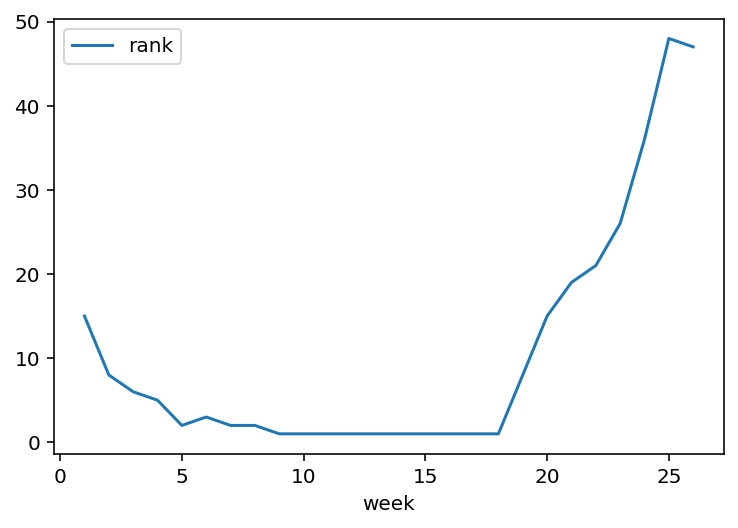

In [26]:
# Maria, Maria 차트 변동
billboard_long[billboard_long['track'] == 'Maria, Maria'].plot(kind='line', x='week', y='rank')
plt.show()

**2) Music 순위 변동**

- Music 순위 변동을 라인 그래프로 표시해 봅니다.

<img src = "https://upload.wikimedia.org/wikipedia/en/f/f3/Madonna%2C_Music_single_cover.png" align="left"/>

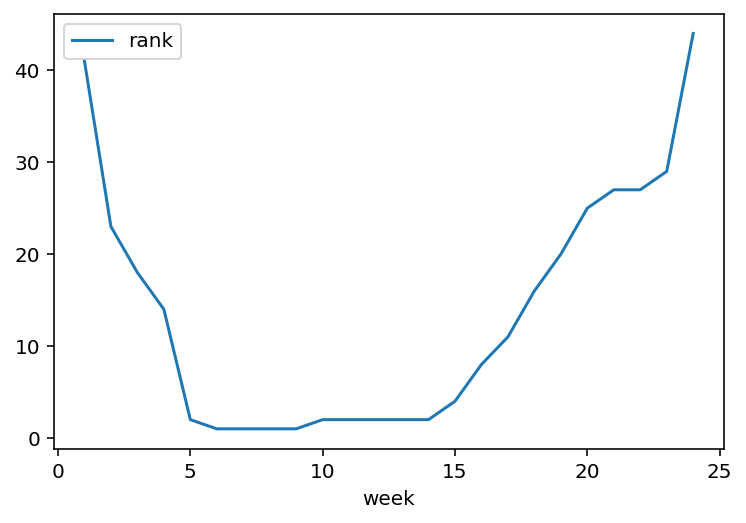

In [27]:
# Music 차트 변동
billboard_long[billboard_long['track'] == 'Music'].plot(kind='line', x='week', y='rank')
plt.show()

## 5. 의미 찾기

- 데이터 분석을 제대로 하려면 제대로된 데이터가 있어야 합니다.
- 다양한 전처리 방법을 사용해 분석이 용이한 형태로 데이터를 변경해야 합니다.
- melt() 함수 사용 방법을 꼭 기억하시기 바랍니다.

## <center>수고하셨습니다.</center>
<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/end.png' width=200/></center>